In [1]:
# Cell 1: Setup

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("SeoulBikeDataClean.csv")
df = df[df['functioning_day'] == 'Yes'].copy()
# Define feature columns
numeric_features = ['temperaturec', 'temperaturec_squared', 'solar_radiation_mj_m2']
categorical_features = ['hour', 'seasons', 'is_raining', 'is_snowing', 'is_holiday', 'is_working_day']

target = 'rented_bike_count'


In [2]:
# Cell 2: Build and fit Ridge model

from sklearn.pipeline import Pipeline

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Ridge regression with regularization strength alpha
ridge_model = make_pipeline(
    preprocessor,
    Ridge(alpha=1.4384)
)

# Fit the model on the full dataset (no train-test split for now)
X = df[numeric_features + categorical_features]
y = df[target]

ridge_model.fit(X, y)

# Predict on the same data (training set performance)
y_pred_train = ridge_model.predict(X)
y_pred_train = np.maximum(y_pred_train, 0)



Train RMSE: 357.33
Train R²: 0.6905


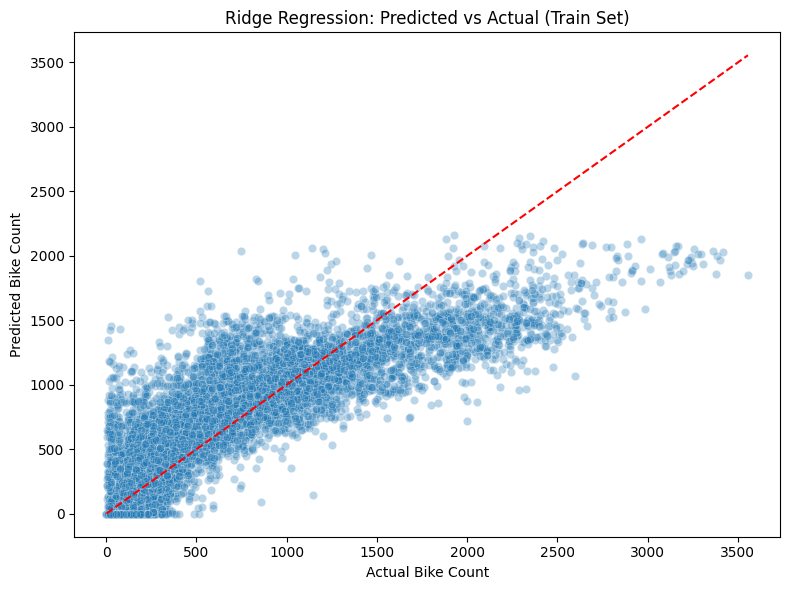

In [3]:
# Cell 3: Evaluate Ridge performance on training set

from sklearn.metrics import mean_squared_error, r2_score

# Evaluation metrics
rmse = mean_squared_error(y, y_pred_train, squared=False)
r2 = r2_score(y, y_pred_train)

print(f"Train RMSE: {rmse:.2f}")
print(f"Train R²: {r2:.4f}")

# Plot: predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred_train, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.xlabel("Actual Bike Count")
plt.ylabel("Predicted Bike Count")
plt.title("Ridge Regression: Predicted vs Actual (Train Set)")
plt.tight_layout()
plt.show()


In [4]:
# Cell 4: Cross-validated Ridge with automatic alpha tuning

from sklearn.linear_model import RidgeCV

# Define candidate alphas to search over (log scale)
alphas = np.logspace(-3, 3, 20)

# Use RidgeCV to search for best alpha
ridgecv_model = make_pipeline(
    preprocessor,
    RidgeCV(alphas=alphas, store_cv_values=True)
)

# Fit model on entire data
ridgecv_model.fit(X, y)

# Get the best alpha
best_alpha = ridgecv_model.named_steps['ridgecv'].alpha_
print(f"✅ Best alpha selected by cross-validation: {best_alpha:.4f}")

# Predict again on training set
y_pred_cv = ridgecv_model.predict(X)


✅ Best alpha selected by cross-validation: 1.4384
